
Gerekli kütüphaneleri içe aktariyoruz


In [2]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score

from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Veri Toplama ve Gözlemleme:

In [3]:
data = pd.read_csv("/content/Melbourne_housing_FULL.csv"). # dosyayı okutmak
df = data.copy()

df.head() # verimizim ilk 5 satırına bakmak

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [4]:
df.shape #satır sütun sayısı

(34857, 21)

In [5]:
df.info() # verimizde null değer var mı,verimizin tipi ne

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [6]:
df.memory_usage()  # her bir sütun bilgisi bellekte ne kadar yer kullanıyor

Index               128
Suburb           278856
Address          278856
Rooms            278856
Type             278856
Price            278856
Method           278856
SellerG          278856
Date             278856
Distance         278856
Postcode         278856
Bedroom2         278856
Bathroom         278856
Car              278856
Landsize         278856
BuildingArea     278856
YearBuilt        278856
CouncilArea      278856
Lattitude        278856
Longtitude       278856
Regionname       278856
Propertycount    278856
dtype: int64

Keşif Amaçlı Veri Analizi

In [7]:
# "object" veri türüne sahip sütunları seçmek
columns_to_convert = df.select_dtypes(include=['object']).columns

# obje veri tipindeki sütünları "category" veri tipine dönüştüyoruz
# daha iyi perfomans ve kolay anlaşılması için
df[columns_to_convert] = df[columns_to_convert].astype('category')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Suburb         34857 non-null  category
 1   Address        34857 non-null  category
 2   Rooms          34857 non-null  int64   
 3   Type           34857 non-null  category
 4   Price          27247 non-null  float64 
 5   Method         34857 non-null  category
 6   SellerG        34857 non-null  category
 7   Date           34857 non-null  category
 8   Distance       34856 non-null  float64 
 9   Postcode       34856 non-null  float64 
 10  Bedroom2       26640 non-null  float64 
 11  Bathroom       26631 non-null  float64 
 12  Car            26129 non-null  float64 
 13  Landsize       23047 non-null  float64 
 14  BuildingArea   13742 non-null  float64 
 15  YearBuilt      15551 non-null  float64 
 16  CouncilArea    34854 non-null  category
 17  Lattitude      26881 non-null  

In [9]:
df.memory_usage()

Index                128
Suburb             80818
Address          1468308
Rooms             278856
Type               34989
Price             278856
Method             35229
SellerG            81114
Date               37585
Distance          278856
Postcode          278856
Bedroom2          278856
Bathroom          278856
Car               278856
Landsize          278856
BuildingArea      278856
YearBuilt         278856
CouncilArea        36193
Lattitude         278856
Longtitude        278856
Regionname         35221
Propertycount     278856
dtype: int64

In [10]:
df.describe().T # kısaca istatistikler

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.0,3.031012e+00,0.969933,1.00000,2.00000,3.0000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.00000,870000.0000,1.295000e+06,1.120000e+07
Distance,34856.0,1.118493e+01,6.788892,0.00000,6.40000,10.3000,1.400000e+01,4.810000e+01
Postcode,34856.0,3.116063e+03,109.023903,3000.00000,3051.00000,3103.0000,3.156000e+03,3.978000e+03
Bedroom2,26640.0,3.084647e+00,0.980690,0.00000,2.00000,3.0000,4.000000e+00,3.000000e+01
Bathroom,26631.0,1.624798e+00,0.724212,0.00000,1.00000,2.0000,2.000000e+00,1.200000e+01
Car,26129.0,1.728845e+00,1.010771,0.00000,1.00000,2.0000,2.000000e+00,2.600000e+01
Landsize,23047.0,5.935990e+02,3398.841946,0.00000,224.00000,521.0000,6.700000e+02,4.330140e+05
BuildingArea,13742.0,1.602564e+02,401.267060,0.00000,102.00000,136.0000,1.880000e+02,4.451500e+04
YearBuilt,15551.0,1.965290e+03,37.328178,1196.00000,1940.00000,1970.0000,2.000000e+03,2.106000e+03


In [11]:
# korelasyon analizi
df.corr(numeric_only=True).T

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.465238,0.271511,0.085890,0.946755,0.611826,0.393878,0.037402,0.156229,-0.012749,0.004872,0.103235,-0.071677
Price,0.465238,1.000000,-0.211384,0.044950,0.430275,0.429878,0.201803,0.032748,0.100754,-0.333306,-0.215607,0.197874,-0.059017
Distance,0.271511,-0.211384,1.000000,0.481566,0.269524,0.126201,0.241835,0.060862,0.076301,0.323059,-0.100417,0.200946,-0.018140
Postcode,0.085890,0.044950,0.481566,1.000000,0.089292,0.120080,0.067886,0.040664,0.042437,0.089805,-0.231027,0.362895,0.017108
Bedroom2,0.946755,0.430275,0.269524,0.089292,1.000000,0.614892,0.388491,0.037019,0.154157,-0.002022,0.003447,0.106164,-0.053451
Bathroom,0.611826,0.429878,0.126201,0.120080,0.614892,1.000000,0.307518,0.036333,0.147558,0.167955,-0.059183,0.106531,-0.032887
Car,0.393878,0.201803,0.241835,0.067886,0.388491,0.307518,1.000000,0.037829,0.104373,0.128702,-0.009020,0.047213,-0.009617
Landsize,0.037402,0.032748,0.060862,0.040664,0.037019,0.036333,0.037829,1.000000,0.354530,0.044474,0.025318,-0.002582,-0.018195
BuildingArea,0.156229,0.100754,0.076301,0.042437,0.154157,0.147558,0.104373,0.354530,1.000000,0.067811,0.017155,-0.002143,-0.024523
YearBuilt,-0.012749,-0.333306,0.323059,0.089805,-0.002022,0.167955,0.128702,0.044474,0.067811,1.000000,0.091592,-0.022175,0.022420


In [12]:
df.corrwith(other=df["Price"], numeric_only=True)

Rooms            0.465238
Price            1.000000
Distance        -0.211384
Postcode         0.044950
Bedroom2         0.430275
Bathroom         0.429878
Car              0.201803
Landsize         0.032748
BuildingArea     0.100754
YearBuilt       -0.333306
Lattitude       -0.215607
Longtitude       0.197874
Propertycount   -0.059017
dtype: float64

Yukarıdakiz analizden bazı sonuçlar çıkarabiliriz:

-Odalar (0,465238): Oda sayısı ile fiyat arasında orta düzeyde pozitif bir korelasyon (0,47) bulunmaktadır. Bu, bir mülkteki oda sayısı arttıkça fiyatın artma eğiliminde olduğunu ancak diğer faktörlerin de fiyatı etkileyebileceğini göstermektedir.

-Fiyat (1,000000): Bir değişkenin kendisiyle olan korelasyonu her zaman 1'dir, çünkü bu mükemmel bir pozitif korelasyondur. "Fiyat"ı kendisiyle karşılaştırdığınız için bu beklenen bir durumdur.

-Mesafe (-0,211384): Gayrimenkulden referans bir noktaya (örn. şehir merkezi) olan mesafe ile fiyat arasında zayıf bir negatif korelasyon (-0,21) vardır. Bu, ortalama olarak mesafe arttıkça mülk fiyatının bir miktar düşme eğiliminde olduğu anlamına gelir.

-Posta kodu (0,044950): Posta kodu ile fiyat arasında çok zayıf bir pozitif korelasyon (0,04) vardır ve bu pratikte anlamlı olmayabilir.

-Yatak Odası2 (0,430275): Yatak odası sayısı ile fiyat arasında orta düzeyde pozitif korelasyon (0,43) bulunmaktadır. Daha fazla yatak odası, daha yüksek mülk fiyatlarıyla ilişkilendirilme eğilimindedir.

-Banyo (0,429878): Yatak odası sayısına benzer şekilde banyo sayısı da fiyatla orta düzeyde pozitif bir korelasyon (0,43) göstermektedir.

-Araba (0,201803): Mülkte mevcut araba yeri sayısı ile fiyat arasında zayıf bir pozitif korelasyon (0,20) vardır.

-Mesafe (-0,211384): Gayrimenkulden referans bir noktaya (örn. şehir merkezi) olan mesafe ile fiyat arasında zayıf bir negatif korelasyon (-0,21) vardır. Bu, ortalama olarak mesafe arttıkça mülk fiyatının bir miktar düşme eğiliminde olduğu anlamına gelir.

-Posta kodu (0,044950): Posta kodu ile fiyat arasında çok zayıf bir pozitif korelasyon (0,04) vardır ve bu pratikte anlamlı olmayabilir.

-Yatak Odası2 (0,430275): Yatak odası sayısı ile fiyat arasında orta düzeyde pozitif korelasyon (0,43) bulunmaktadır. Daha fazla yatak odası, daha yüksek mülk fiyatlarıyla ilişkilendirilme eğilimindedir.

-Banyo (0,429878): Yatak odası sayısına benzer şekilde banyo sayısı da fiyatla orta düzeyde pozitif bir korelasyon (0,43) göstermektedir.

-Araba (0,201803): Mülkte mevcut araba yeri sayısı ile fiyat arasında zayıf bir pozitif korelasyon (0,20) vardır.

In [13]:
# eksik verilerin sayısına bakmak
df.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [14]:
#Yinelenen satırları kontrol etmek
df[df.duplicated()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
15858,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,17/06/2017,15.4,3131.0,...,3.0,2.0,405.0,226.0,2000.0,Manningham City Council,-37.82678,145.16777,Eastern Metropolitan,4973.0


In [15]:
# tekrarlanan satırları silmek
df.drop_duplicates(inplace=True)

In [16]:
# kategorik sütünların tekrarlanmayan değerleri kontrol ediliyor
categorical_columns = df.select_dtypes(include=['category']).columns

for column in categorical_columns:
    unique_values = df[column].unique()
    print(f'Column "{column}" unique values: {unique_values}')

Column "Suburb" unique values: ['Abbotsford', 'Airport West', 'Albert Park', 'Alphington', 'Altona', ..., 'Fawkner Lot', 'Ferny Creek', 'Wandin North', 'Kalkallo', 'Menzies Creek']
Length: 351
Categories (351, object): ['Abbotsford', 'Aberfeldie', 'Airport West', 'Albanvale', ..., 'Yarra Glen',
                           'Yarraville', 'croydon', 'viewbank']
Column "Address" unique values: ['68 Studley St', '85 Turner St', '25 Bloomburg St', '18/659 Victoria St', '5 Charles St', ..., '78 Bayview Rd', '29A Murray St', '147A Severn St', '12/37 Stephen St', '3 Tarrengower St']
Length: 34009
Categories (34009, object): ['1 Abercrombie St', '1 Aberfeldie Wy', '1 Acacia St', '1 Acheron Av', ...,
                             '9b Bewdley St', '9b Latham St', '9b Marquis Rd', '9b Stewart St']
Column "Type" unique values: ['h', 'u', 't']
Categories (3, object): ['h', 't', 'u']
Column "Method" unique values: ['SS', 'S', 'VB', 'SP', 'PI', 'SN', 'W', 'PN', 'SA']
Categories (9, object): ['PI', 'PN', 

Z Skoru ile Aykırı Değerleri Ayıklamak:

Aşağıdaki formülü kullanarak z-skoru hesaplıyoruz:

 z=(x −μ) /σ

Z-skoru kullanarak aykırı değerleri tespit etmek ve kaldırmak için veri setimizdeki her bir değerin z-puanını hesaplamamız ve ardından 3'ün üzerindeki veya -3'ün altındaki değerleri kaldırmamız gerekecektir.
formulü z =(x −μ) /σ

In [17]:
numerical_columns = df.select_dtypes(exclude="category").columns

z_score_threshold = 3

for col in numerical_columns:
    z_scores = (df[col] - df[col].mean())/df[col].std()
    outliers = (z_scores < -z_score_threshold) | (z_scores > z_score_threshold)
    print("Outlier counts of column:", col, df[col][outliers].count())
    #df[col]=df[col][~outliers]
    df[col][outliers] = np.nan # nan ile değiştir

Outlier counts of column: Rooms 269
Outlier counts of column: Price 474
Outlier counts of column: Distance 792
Outlier counts of column: Postcode 558
Outlier counts of column: Bedroom2 73
Outlier counts of column: Bathroom 371
Outlier counts of column: Car 353
Outlier counts of column: Landsize 43
Outlier counts of column: BuildingArea 9
Outlier counts of column: YearBuilt 9
Outlier counts of column: Lattitude 324
Outlier counts of column: Longtitude 315
Outlier counts of column: Propertycount 844


<ipython-input-17-5d0c1405d5d6>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][outliers] = np.nan # replace with nan
<ipython-input-17-5d0c1405d5d6>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][outliers] = np.nan # replace with nan
<ipython-input-17-5d0c1405d5d6>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][outliers] = np.nan # replace with nan
<ipython-input-17-5d0c1405d5d6>:10: SettingWithCopyWarn

Eksik Değerlerin Doldurulması

In [18]:
df.isna().sum()

Suburb               0
Address              0
Rooms              269
Type                 0
Price             8083
Method               0
SellerG              0
Date                 0
Distance           793
Postcode           559
Bedroom2          8290
Bathroom          8597
Car               9081
Landsize         11853
BuildingArea     21124
YearBuilt        19315
CouncilArea          3
Lattitude         8300
Longtitude        8291
Regionname           3
Propertycount      847
dtype: int64

In [19]:
# Fiyat ile ilişkisi çok zayıf olan özellikleri kaldırın, adres gerekli değildir
df.drop(columns=["Postcode", "Landsize", "BuildingArea",
                 "Lattitude", "Longtitude", "Propertycount"], inplace=True)

In [20]:
df.isna().sum()

Suburb             0
Address            0
Rooms            269
Type               0
Price           8083
Method             0
SellerG            0
Date               0
Distance         793
Bedroom2        8290
Bathroom        8597
Car             9081
YearBuilt      19315
CouncilArea        3
Regionname         3
dtype: int64

In [21]:
# Banyo ve Arabanın eksik değerlerini modla doldurun
df['Bathroom'].fillna(df['Bathroom'].mode()[0], inplace=True)
df['Car'].fillna(df['Car'].mode()[0], inplace=True)

In [22]:
# Rooms ve Type'ı gruplandırarak Bedroom2'nin ortak değerini kontrol edin
df[["Rooms", "Type","Bedroom2"]].groupby(["Type","Rooms"]).agg(pd.Series.mode)

Bedroom2
Type Rooms          
h    1.0         1.0
     2.0         2.0
     3.0         3.0
     4.0         4.0
     5.0         5.0
t    1.0         1.0
     2.0         2.0
     3.0         3.0
     4.0         4.0
     5.0         5.0
u    1.0         1.0
     2.0         2.0
     3.0         3.0
     4.0         4.0
     5.0         5.0

In [23]:
# Eksik oda değerlerini varsa Bedroom2 ile değiştirin.
missing_room_idx=df.loc[df["Rooms"].isna()]["Rooms"].index.tolist()

for i in missing_room_idx:
    df.loc[i, "Rooms"] = df._get_value(i, "Bedroom2")

In [24]:
# Eksik oda içeren kalan satırları silin ve Bedroom2'yu bırakın
df.dropna(axis=0, subset="Rooms", inplace=True)
df.drop(columns=["Bedroom2"], inplace=True)

In [25]:
df.isna().sum()

Suburb             0
Address            0
Rooms              0
Type               0
Price           8048
Method             0
SellerG            0
Date               0
Distance         789
Bathroom           0
Car                0
YearBuilt      19254
CouncilArea        3
Regionname         3
dtype: int64

In [26]:
# Eksik Regionname satırlarını kontrol edin.
df.loc[df["Regionname"].isna()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Bathroom,Car,YearBuilt,CouncilArea,Regionname
18523,Footscray,2/16 Stafford St,2.0,u,710000.0,S,Jas,15/07/2017,5.1,1.0,2.0,NaN,NaN,NaN
26888,Camberwell,2/3 Kingsley St,2.0,h,825000.0,VB,Jellis,11/11/2017,7.7,1.0,2.0,NaN,NaN,NaN
29483,Fawkner Lot,1/3 Brian St,3.0,h,616000.0,SP,Brad,6/01/2018,NaN,1.0,2.0,NaN,NaN,NaN


In [27]:
# Eksik Regionname aynı Suburb veya aynı Address'teki değerle değiştirin
df.loc[18523 ,"Regionname"] = df[df["Suburb"] == "Footscray"]["Regionname"].mode()[0]
df.loc[26888 ,"Regionname"] = df[df["Suburb"] == "Camberwell"]["Regionname"].mode()[0]
df.loc[29483 ,"Regionname"] = df[df["Address"].str.contains("Brian St")]["Regionname"].mode()[0]

In [28]:
# Eksik CouncilArea satırlarını kontrol edin.
df.loc[df["CouncilArea"].isna()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Bathroom,Car,YearBuilt,CouncilArea,Regionname
18523,Footscray,2/16 Stafford St,2.0,u,710000.0,S,Jas,15/07/2017,5.1,1.0,2.0,NaN,NaN,Western Metropolitan
26888,Camberwell,2/3 Kingsley St,2.0,h,825000.0,VB,Jellis,11/11/2017,7.7,1.0,2.0,NaN,NaN,Southern Metropolitan
29483,Fawkner Lot,1/3 Brian St,3.0,h,616000.0,SP,Brad,6/01/2018,NaN,1.0,2.0,NaN,NaN,Northern Metropolitan


In [29]:
# Eksik CouncilArea'yı aynı Suburb'de bulunan en yaygın değerle değiştirin
df.loc[18523 ,"CouncilArea"] = df[df["Suburb"] == "Footscray"]["CouncilArea"].mode()[0]
df.loc[26888 ,"CouncilArea"] = df[df["Suburb"] == "Camberwell"]["CouncilArea"].mode()[0]
df.loc[29483 ,"CouncilArea"] = df[df["Address"].str.contains("Brian St")]["CouncilArea"].mode()[0]

In [30]:
# YearBuilt'nı gruplandırarak evlerin maksimum mesafesini bulun.
grouped_yearBuilt_by_distance=df[["Distance", "YearBuilt"]].groupby("YearBuilt").max()

# Distance ve  YearBuilt birbirleriyle diğerlerine göre güçlü bir korelasyona sahip olduğundan,
# eksik null Distance değerlerini aynı YearBuilt'i kontrol ederek değiştirebiliriz.
for k1, v1 in df[df["Distance"].isna()][["Distance", "YearBuilt"]].iterrows():
    for year, val in grouped_yearBuilt_by_distance.iterrows():
        if(v1["YearBuilt"] == year):
            df.at[k1, "Distance"] = val["Distance"]

In [31]:
# Kalan eksik değerleri kontrol edin
df.isna().sum()

Suburb             0
Address            0
Rooms              0
Type               0
Price           8048
Method             0
SellerG            0
Date               0
Distance         390
Bathroom           0
Car                0
YearBuilt      19254
CouncilArea        0
Regionname         0
dtype: int64

In [32]:
# Distance'da val eksik olan tüm satırları kaldırın
# Yearbuilt'de çok sayıda eksik değer var, dolayısıyla atılacak
# Suburb ve Regionname özellikleri nedeniyle Address gerekli değildir
# Date gerekli değil

df.dropna(axis=0, subset="Distance", inplace=True)
df.drop(["Address", "YearBuilt", "Date"],axis=1,inplace=True)

In [33]:
# Rooms ve Regionname adını gruplayarak evlerin ortalama fiyatını bulun
grouped_price=df[["Price", "Rooms", "Regionname"]].groupby(["Rooms", "Regionname"]).agg("mean")

# Replace missing null price with others in same regionname and same room numbers
for k1, v1 in df[df["Price"].isna()].iterrows():
    for k2, v2 in grouped_price.iterrows():
        if(v1["Rooms"] == k2[0] and v1["Regionname"] == k2[1]):
            df.at[k1, "Price"] = v2["Price"]

In [34]:
# Kalan eksik değerleri kontrol edin
df.isna().sum()

Suburb         0
Rooms          0
Type           0
Price          2
Method         0
SellerG        0
Distance       0
Bathroom       0
Car            0
CouncilArea    0
Regionname     0
dtype: int64

In [35]:
# Price'taki tüm satırları eksik bırak
df.dropna(axis=0, subset="Price", inplace=True)

In [36]:
# En son durumdaki veri
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34378 entries, 0 to 34856
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Suburb       34378 non-null  category
 1   Rooms        34378 non-null  float64 
 2   Type         34378 non-null  category
 3   Price        34378 non-null  float64 
 4   Method       34378 non-null  category
 5   SellerG      34378 non-null  category
 6   Distance     34378 non-null  float64 
 7   Bathroom     34378 non-null  float64 
 8   Car          34378 non-null  float64 
 9   CouncilArea  34378 non-null  category
 10  Regionname   34378 non-null  category
dtypes: category(6), float64(5)
memory usage: 1.9 MB


<Axes: xlabel='Price', ylabel='Count'>

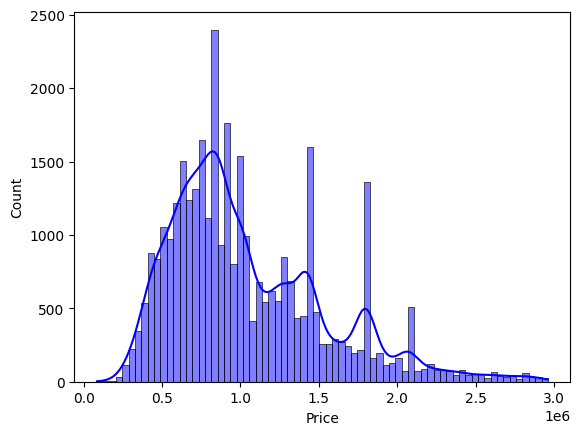

In [37]:
# Fiyat dağılımını görmek için histogram oluşturur
sns.histplot(data=df["Price"], kde=True, color="blue" )

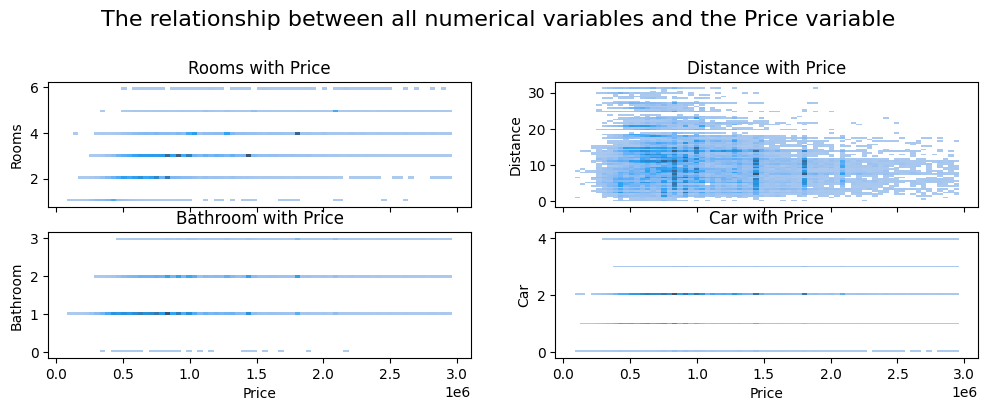

In [38]:
# Fiyat ile sayısal sütunlar arasındaki ilişkilerin histogramını oluşturur

fig, axes = plt.subplots(2, 2, sharex=True, figsize=(12,4))
plt.subplots_adjust(top=0.80)
fig.suptitle('The relationship between all numerical variables and the Price variable', fontsize=16)
axes[0,0].set_title('Rooms with Price')
sns.histplot(ax=axes[0,0], data=df, x="Price", y="Rooms")

axes[0,1].set_title('Distance with Price')
sns.histplot(ax=axes[0,1], data=df, x="Price", y="Distance")

axes[1,0].set_title('Bathroom with Price')
sns.histplot(ax=axes[1,0], data=df, x="Price", y="Bathroom")

axes[1,1].set_title('Car with Price')
sns.histplot(ax=axes[1,1], data=df, x="Price", y="Car")
plt.savefig('relationship_with_price.png')

<Axes: >

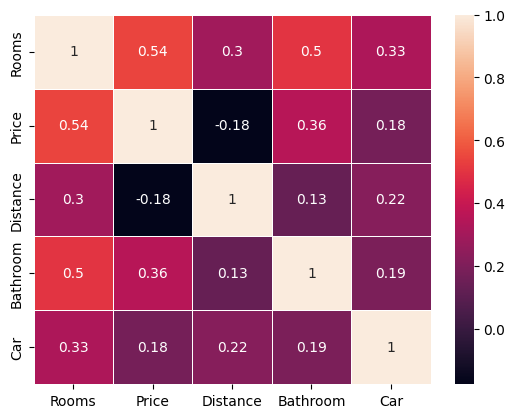

In [39]:
# Korelasyon matrisi
sns.heatmap(df.corr(numeric_only=True).T, annot=True, linewidths=.5)

Label Encoding

In [40]:
transformed_df=df.copy()
categorical_columns = df.select_dtypes(include="category").columns

le = LabelEncoder()

for i in categorical_columns:
    transformed_df[i]=le.fit_transform(transformed_df[i])

In [41]:
transformed_df.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Bathroom,Car,CouncilArea,Regionname
0,0,2.0,0,7.416325e+05,6,151,2.5,1.0,1.0,31,2
1,0,2.0,0,1.480000e+06,2,32,2.5,1.0,1.0,31,2
2,0,2.0,0,1.035000e+06,2,32,2.5,1.0,0.0,31,2
3,0,3.0,2,8.996065e+05,7,287,2.5,2.0,1.0,31,2
4,0,3.0,0,1.465000e+06,5,32,2.5,2.0,0.0,31,2


Veri Setinin Bölünmesi

In [42]:
X = transformed_df.drop(['Price'], axis = 1)
y = df['Price']

In [43]:
# Veri kümesini 80-20 oranına sahip eğitim ve test kümelerine bölünmesi
X_train, X_test,y_train, y_test =train_test_split(X,y, test_size=0.2)

In [44]:
# MinMaxScaler'ı başlatmak
scaler = MinMaxScaler()

# Verileri 0 ile 1 arasında yapmak için ölçekleyiciyi kullanarak eğitim verilerini sığdırın ve dönüştürün
scaled_training_df = scaler.fit_transform(X_train)

# Test verilerini dönüştürün, tren verilerinde öğrenilen parametreleri ölçeklendirmek için 'transform' yöntemini kullanıyoruz.
scaled_test_df=scaler.transform(X_test)

Model Seçimi

In [45]:
def select_best_model(models, X, y, cv=10, scoring='neg_mean_squared_error'):
    """
    Çapraz doğrulamayı kullanarak bir model listesi arasından en iyi modeli seçer ve model adlarını ve puanlarını içeren bir DataFrame döndürür.

    Parametreler:
    - models (dict): Anahtar olarak model adlarından ve değer olarak model nesnelerinden oluşan bir sözlük.
    - X (array-like): Özellik matrisi.
    - y (array-like): Hedef değişken.
    - cv (int, optional): Çapraz doğrulama katlamalarının sayısı (default olarak 5).
    - scoring (str, optional): Çapraz doğrulama için puanlama metriği (default olarak 'neg_mean_squared_error').

    Returns:
    - results_df (DataFrame): İki sütunlu bir DataFrame - 'Model' ve 'RMSE Score'.
    """
    model_names = []
    rmse_scores = []

    for model_name, model in models.items():
        # Çapraz doğrulama gerçekleştirin
        cv_scores = cross_val_score(model, X, y, cv=cv, scoring=scoring)
        rmse_score = np.mean(np.sqrt(np.abs(cv_scores)))

        # Model adını ve puanlarını listelere ekleyin
        model_names.append(model_name)
        rmse_scores.append(rmse_score)

    # Listelerden bir DataFrame oluşturun
    results_df = pd.DataFrame({'Model': model_names, 'RMSE Score': rmse_scores})

    return results_df

In [46]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet': ElasticNet(),
    'SVR': SVR(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'AdaBoostRegressor': AdaBoostRegressor(),
}

# En iyi modeli seçmek ve sonuçları almak için işlevi çağırın DataFrame
results_df = select_best_model(models, X_train, y_train)

print("Model Comparison Results:")
print(results_df)

Model Comparison Results:
                       Model     RMSE Score
0          Linear Regression  355737.685732
1           Ridge Regression  355737.678456
2           Lasso Regression  355737.684973
3                 ElasticNet  367619.053193
4                        SVR  518552.871659
5              Decision Tree  335382.412624
6              Random Forest  265175.476299
7        KNeighborsRegressor  332665.367537
8  GradientBoostingRegressor  258732.607597
9          AdaBoostRegressor  397228.697740


Hiperparametre Optimizasyonu

In [47]:
# Grid Search CV
gb_reg = GradientBoostingRegressor()

# Aranacak hiperparametreleri ve bunların olası değerlerini tanımlayın
param_grid = {
    'n_estimators': [10, 20, 30, 40, 50, 60, 100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
    'subsample': [0.5, 0.7, 1.0]
}

#  GridSearchCV objesi yap
grid_search = GridSearchCV(estimator=gb_reg, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5)

# Verileriniz üzerinde grid search gerçekleştirin
grid_search.fit(X, y)

# En iyi hiperparametreleri ve karşılık gelen puanı yazdırın
print("Best Parameters:", grid_search.best_params_)
print("Best RMSE Score:", np.sqrt(-grid_search.best_score_))

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}
Best RMSE Score: 250616.47984117706


In [48]:
selected_model = GradientBoostingRegressor(n_estimators=200, max_depth=5,
                                           learning_rate=0.1, subsample=1)
final_model = selected_model.fit(X_train,y_train)
final_model_pred = final_model.predict(X_test)
print(math.sqrt(mean_squared_error(y_test, final_model_pred)))

246762.54273432094


Model Değerlendirmesi

In [49]:
print("Final Model Mean Squared Error", mean_squared_error(y_test, final_model_pred))
print("Final Model Root Mean Squared Error", math.sqrt(mean_squared_error(y_test, final_model_pred)))
print("Final Model Mean Absolute Error", mean_absolute_error(y_test, final_model_pred))
print("Final Model R2 Score", r2_score(y_test, final_model_pred))

Final Model Mean Squared Error 60891752496.70757
Final Model Root Mean Squared Error 246762.54273432094
Final Model Mean Absolute Error 172516.66089977053
Final Model R2 Score 0.7526531067502975
